In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ds=pd.read_csv(r'C:\Users\hp\Downloads\Admission_Predict.csv')

In [3]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
ds.drop(['Serial No.'],axis=1,inplace=True)

KeyError: "['Serial No.'] not found in axis"

In [19]:
#feature=[features for features in ds.columns]
#print(feature)
X = ds.drop(['Chance of Admit '], axis=1)
print(X)

    

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
5          330          115                  5  4.5   3.0  9.34         1
6          321          109                  3  3.0   4.0  8.20         1
7          308          101                  2  3.0   4.0  7.90         0
8          302          102                  1  2.0   1.5  8.00         0
9          323          108                  3  3.5   3.0  8.60         0
10         325          106                  3  3.5   4.0  8.40         1
11         327          111                  4  4.0   4.5  9.00         1
12         328          112           

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


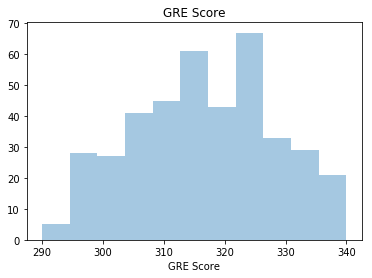

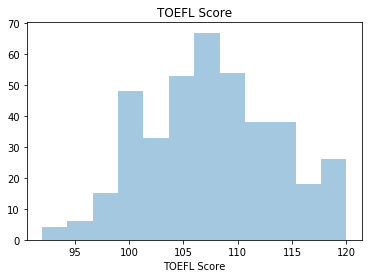

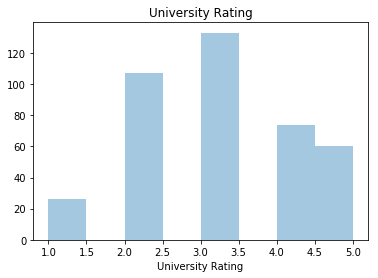

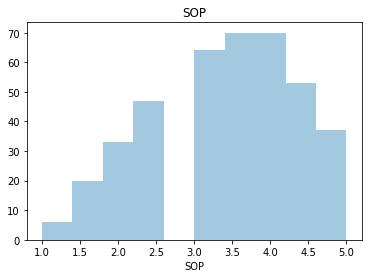

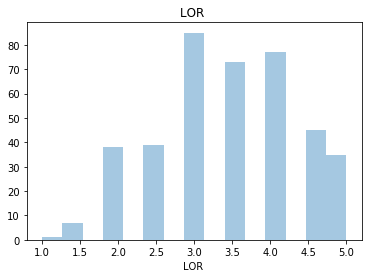

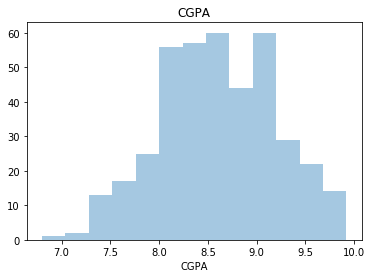

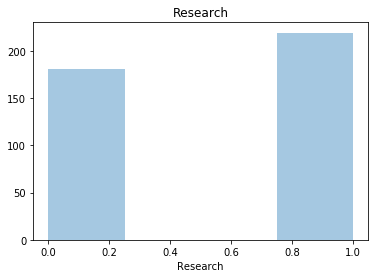

In [21]:
for feature in X:
    fig = sns.distplot(ds[feature], kde=False)
    plt.title(feature)
    plt.show()

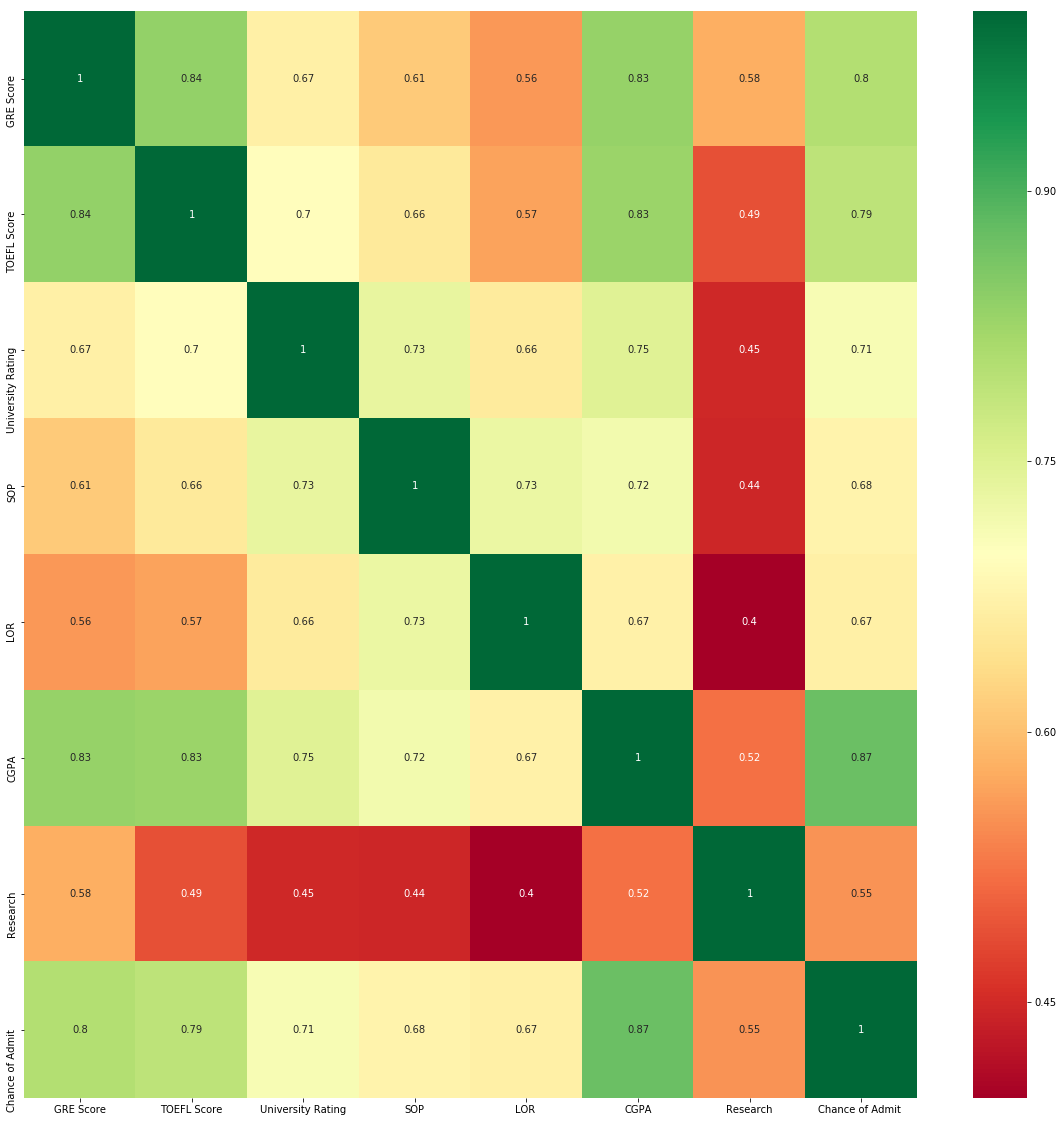

In [18]:
# get correlations of each features in the dataset
corrmat=ds.corr()
top_corr_mat=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ds[top_corr_mat].corr(),annot=True,cmap="RdYlGn")

In [24]:
from sklearn.model_selection import train_test_split

X = ds.drop(['Chance of Admit '], axis=1)
Y = ds['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predictions)))

0.07112044168943515


In [28]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


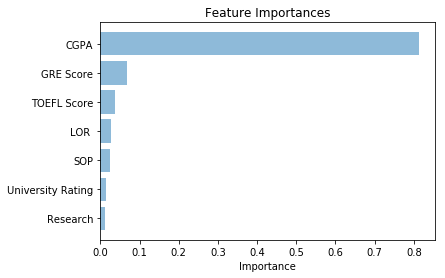

In [29]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()